# image 불러오기

image size : <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1727 at 0x2D0E19821F0>


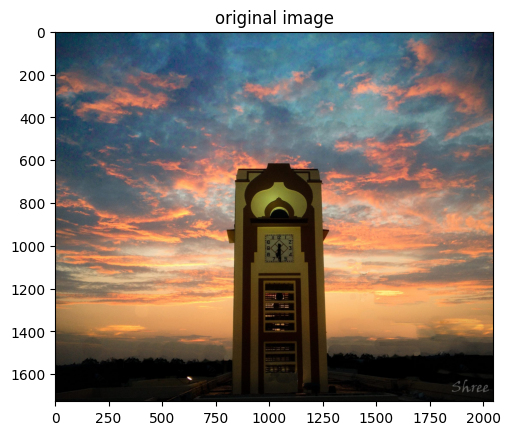

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('../datasets/image/test.jpg')
print(f'image size : {img}')

plt.title('original image')
plt.imshow(img)

# gray 색상으로 변경

(2048, 1727)
[[44. 46. 49. ... 47. 44. 41.]
 [51. 50. 50. ... 46. 46. 46.]
 [57. 54. 52. ... 43. 47. 50.]
 ...
 [ 7.  7.  6. ...  5.  5.  5.]
 [ 6.  6.  6. ...  6.  5.  5.]
 [ 5.  5.  5. ...  5.  4.  4.]]


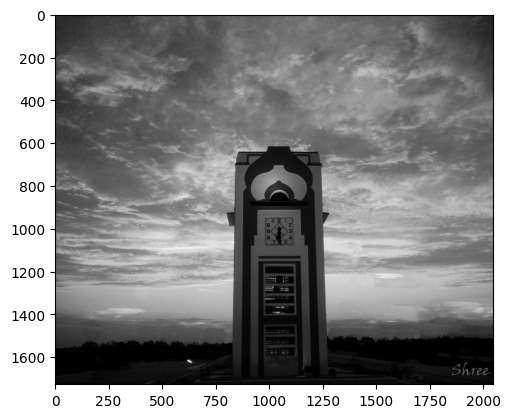

In [25]:
gray_img = img.convert('LA')
print(gray_img.size)

imgmat = np.array(list(gray_img.getdata(band=0)), float)
imgmat.shape = (gray_img.size[1], gray_img.size[0])
imgmat = np.matrix(imgmat)
print(imgmat)

plt.imshow(imgmat, cmap='gray')

# U, S, Vt 로 분해 -> 이미지 특성 파악

After compression


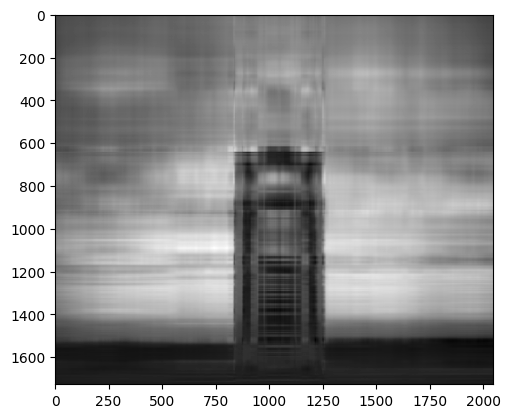

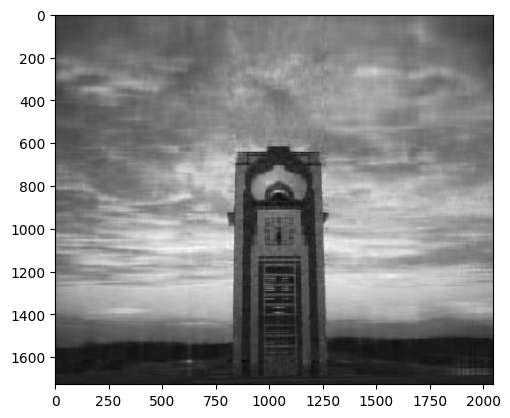

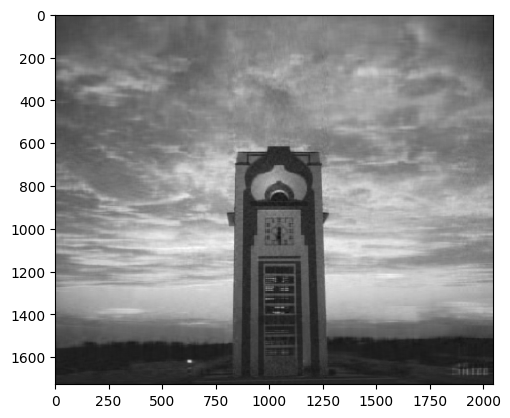

In [33]:
print('After compression')
U, S, Vt = np.linalg.svd(imgmat)

for i in range(5, 51, 20): # feature를 5개, 25개, 45개 이용해 이미지 특성 잘 나타내는지 파악
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(cmpimg, cmap='gray')
    plt.show()
    result = Image.fromarray(cmpimg.astype(np.uint8))

result.save('compressed .jpg')